<a href="https://colab.research.google.com/github/eryyyj/Machine_Learning/blob/main/Finals/HOA7.1/Pisalbon_Hands_on_Activity_7_1_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 5.1: Clustering

#### Objective:

This activity aims to perform classification  of unlabeled data using K Means and Agglomerative Clustering

#### Intended Learning Outcomes (ILOs):
* Build the model using K Means and Agglomerative clustering.
* Determine the optimum number of clusters using elbow method.
* Visualize the dendogram produced by the agglomerative clustering


#### Resources:
* Jupyter Notebook
* Wholesale customers data.csv

#### Procedure:

We will used K-Means clustering to cluster the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.


Import the needed libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
# connecting the notebook to my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the dataset and check the first five rows

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATASETS/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Check the descriptive statistics of the dataset

In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Since K-Means is a distance-based algorithm, the difference between the magnitudes of the data will create a problem. Let us apply featuring scaling to standardize the data.

In [ ]:
# Use standard scaler to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Build the K-Means model

In [ ]:
# Create cluster of 2
kmeans = KMeans(n_clusters=2, init='k-means++')

# fit the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

 Calculate the inertia to evaluate how well the formed clusters are.

In [ ]:
# inertia on the fitted data
kmeans.inertia_

2599.387384912305

Interpret the result of the inertia

Type your answer here

Use the elbow curve to determine the optimum number of clusters in Python.



Text(0, 0.5, 'Inertia')

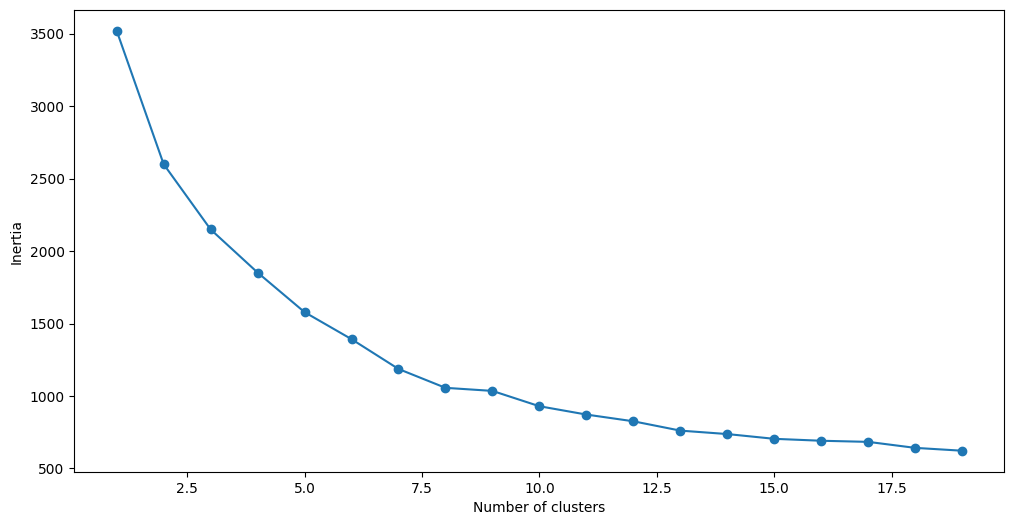

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
print('inertia of 19 clusters is',SSE[18])

inertia of 19 clusters is 622.5246384963893


Interpret the result of the elbow curve.

My Interpretation on the result of the elbow curve is that as we train the Kmeans model with increasing value of number of clusters, it also shows the decreasing value of inertia, meaning with the low value of inertia we can get the best model for our dataset

I can tell just by looking at the graph the best number of clusters that we can use in this model is number 19 because it has the lowest value of inertia which is 602.04


Build a model using 5 clusters and k-means ++ initialization

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans( n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

,count
cluster,
0,250
1,129
2,49
3,10
4,2


There are 208 data points belonging to cluster 1 (index 1), then 125 points in cluster 2 (index 2), and so on.

Compute the centroids of the K means cluster

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-6.90297086e-01 -7.13503779e-02 -2.45178366e-01 -3.82929927e-01
  -4.66438944e-01 -6.78171596e-02 -4.38429901e-01 -1.90136164e-01]
 [ 1.44865163e+00  9.95267746e-02 -3.31664025e-01  4.39703250e-01
   6.47756697e-01 -3.28690316e-01  6.64703810e-01  4.36257089e-02]
 [-5.59341042e-01  1.15686783e-01  1.98641298e+00 -1.40291252e-01
  -2.36571808e-01  8.27989412e-01 -4.37309311e-01  3.86619523e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-6.90297086e-01 -5.58343155e-02  1.80335587e+00  3.33298726e+00
   9.42518505e-01  9.40980070e+00 -4.46409015e-01  8.96415723e+00]]


What is the purpose of the centroids?

The purpose of centroids in Kmeans clustering model is that they represent the centers for every cluster in our every dataset, by having those centroids we can group the datapoints in our datasets based on its nearest centroids. The purpose of the centroids is also crucial for evaluating the performance of our model because it is needed to calculate the inertia of which we will know if we have a good model or a bad one. <br> <br>

In this dataset we have 5 centroids pertaining to 5 numbers of cluster in our model and by running code kmeans.cluster_centers_ shows the coordinates of those 5 centroids in the feature space.


Fit an agglomerative clustering model with two clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data_scaled)
df['agglom'] = ag.fit_predict(data_scaled)

Visualize the dendrogram produced by agglomerative clustering

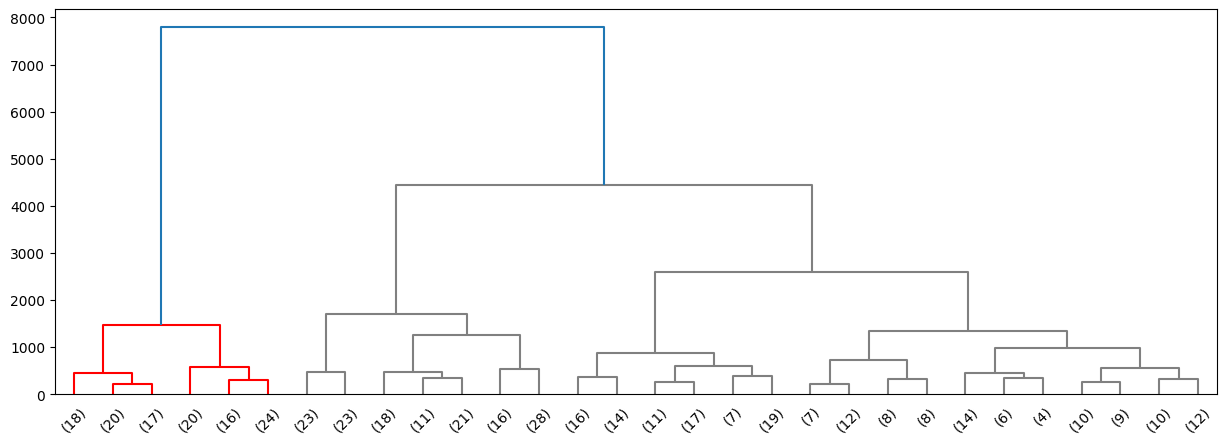

In [ ]:
from scipy.cluster import hierarchy
from matplotlib import colors
import seaborn as sns

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette(['red', 'gray'])

den = hierarchy.dendrogram(Z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

Interpret the result of the dendogram

My interpretation of the result of the dendogram are having a lower value of number of clusters in or model yields an increase value of the distance between clusters or the y value in the graph, because in the graph the longest y value in the graph is 4000 that only yields 2 cluster groups (the one we inputted in the code). <br> <br> The y-value in the graph tells us the value of the distance of the mergepoints, for example, the merge between 20 and 17 shows a pretty short y value while the merging of 16 and 28 shows a longer y value, it means that 20 and 17 is closer to each other than the merge of 16 and 28

Supplementary Activity:
* Choose your own dataset.
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Standardize the variables.
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Use k-means clustering to identify the groups of the dataset.
* Use 1 to 10 clusters
* Determine the optimum number of clusters
* Use agglomerative clustering and visualize the dendogram
* Compare the results obtained by the K means and agglomerative clustering.

In [ ]:
# dataset Iris dataset
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
# merging the iris dataset into a dataframe
# i will not include the labels since we are practicing unsupervised learning
irisdf = pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# printing the number of datapoints
print('Number of datapoints:', len(irisdf))

Number of datapoints: 150


In [ ]:
# printing the number of columns
print('Number of columns:', len(irisdf.columns))

Number of columns: 4


In [ ]:
# getting the datatypes of the dataset
irisdf.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64


In [ ]:
# doing the data cleaning
irisdf.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [ ]:
# standardizing the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ir_data_scaled = scaler.fit_transform(irisdf)

In [ ]:
# getting the mean, median and mode of my dataset
desc_stat = irisdf.describe()

# renaming 50% to median
desc_stat.rename(index={'50%':'median'}, inplace=True)
desc_stat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
median,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# putting the mode of the data set in my descriptive statistic
desc_stat.loc['mode'] = irisdf.mode().iloc[0]
desc_stat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
median,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
mode,5.000000,3.000000,1.400000,0.200000


Text(0.5, 1.0, 'sepal length vs. sepal width')

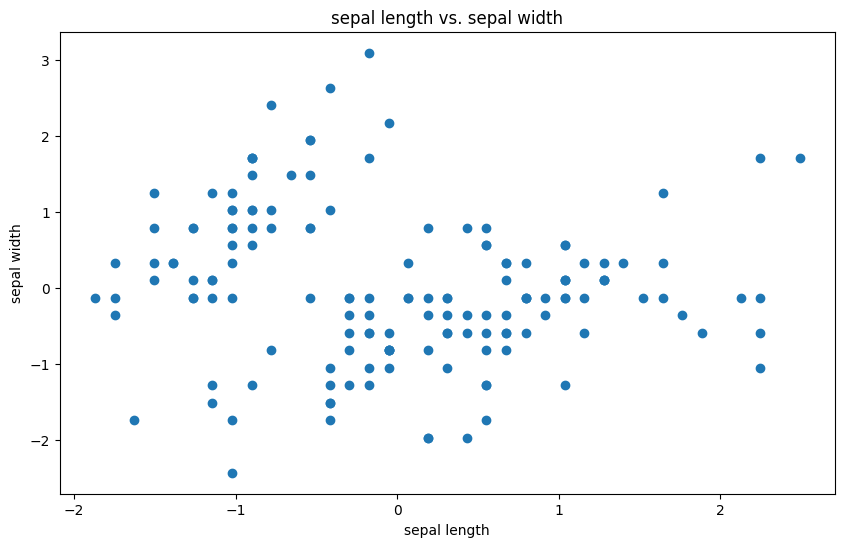

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ir_data_scaled[:, 0], ir_data_scaled[:, 1])  # Plotting the first two features
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("sepal length vs. sepal width")

Text(0.5, 1.0, 'petal length vs. petal width')

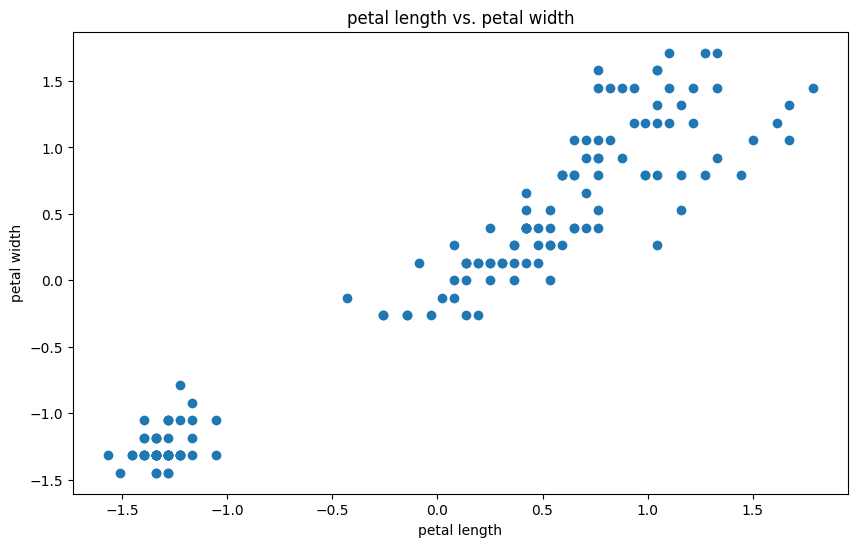

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(ir_data_scaled[:, 2], ir_data_scaled[:, 3])  # Plotting the first two features
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal length vs. petal width")

number of clusters: 1 
 inertia value: 600.0 
number of clusters: 2 
 inertia value: 222.36170496502302 
number of clusters: 3 
 inertia value: 140.90153181202444 
number of clusters: 4 
 inertia value: 128.00719678659993 
number of clusters: 5 
 inertia value: 91.5553623535022 
number of clusters: 6 
 inertia value: 82.39309600581552 
number of clusters: 7 
 inertia value: 74.1524941344589 
number of clusters: 8 
 inertia value: 62.737581715992604 
number of clusters: 9 
 inertia value: 55.434693101026994 
number of clusters: 10 
 inertia value: 47.55561747668113 


Text(0, 0.5, 'Inertia')

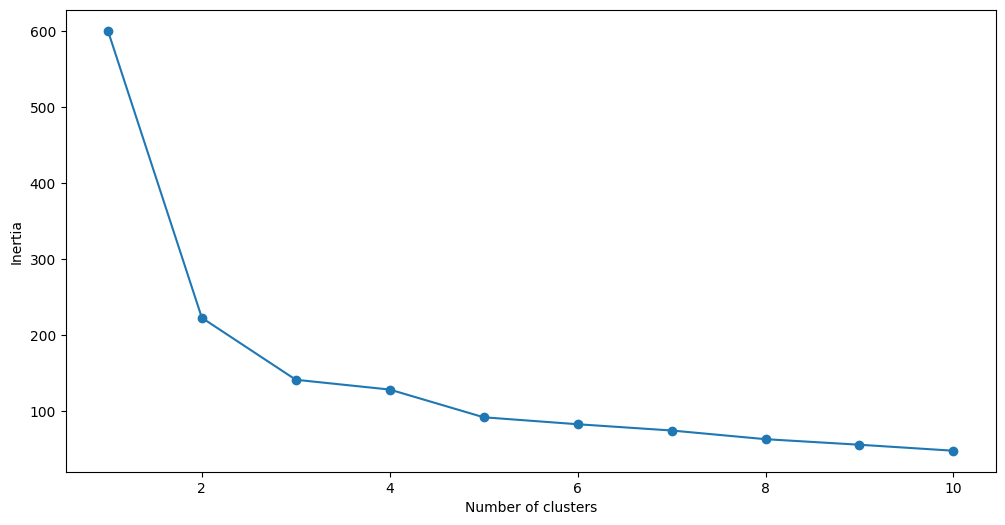

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
ir_SSE = []
cluster_SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(ir_data_scaled)
    print('number of clusters:', cluster, '\n inertia value:', kmeans.inertia_,'\n ====================')
    ir_SSE.append(kmeans.inertia_)
    cluster_SSE.append([cluster, kmeans.inertia_])

frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':ir_SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# Determine the optimum number of clusters
cluster_SSE.sort(key=lambda x: x[1]) # Sort based on the second element (inertia)
print('optimum number of cluster :', cluster_SSE[0][0], 'with inertia :', cluster_SSE[0][1])

optimum number of cluster : 10 with inertia : 47.55561747668113


In [ ]:
# using agglomerative clustering for my dataset
ag = AgglomerativeClustering(n_clusters=9, linkage='ward', compute_full_tree=True)
ag_ir = ag.fit(ir_data_scaled)
irisdf['agglom'] = ag.fit_predict(ir_data_scaled)

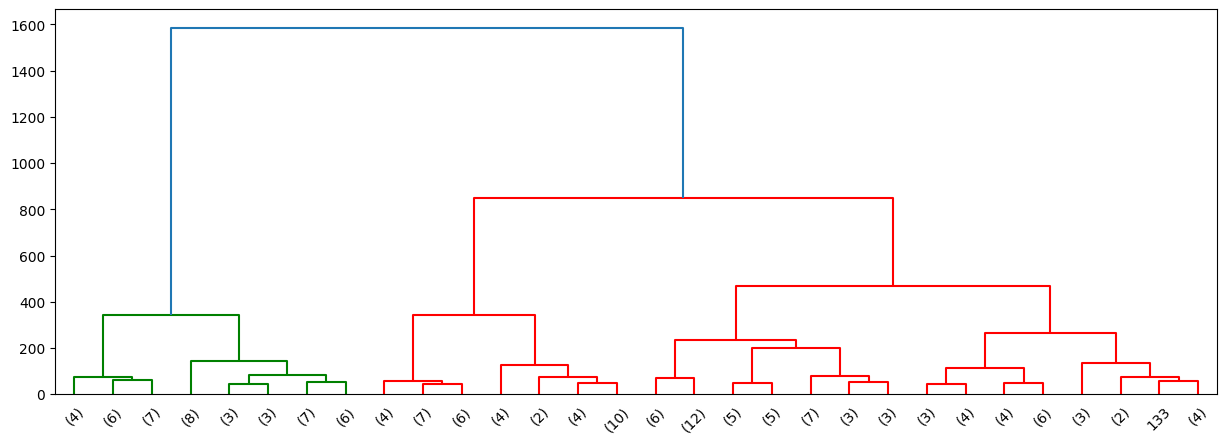

In [ ]:
from scipy.cluster import hierarchy
from matplotlib import colors
import seaborn as sns

Z = hierarchy.linkage(ag_ir.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette(['green', 'red'])

den = hierarchy.dendrogram(Z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

Supplementary Activity:
* Choose your own dataset.
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Standardize the variables.
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Use k-means clustering to identify the groups of the dataset.
* Use 1 to 10 clusters
* Determine the optimum number of clusters
* Use agglomerative clustering and visualize the dendogram
* Compare the results obtained by the K means and agglomerative clustering.

Text(0, 0.5, 'sepal width')

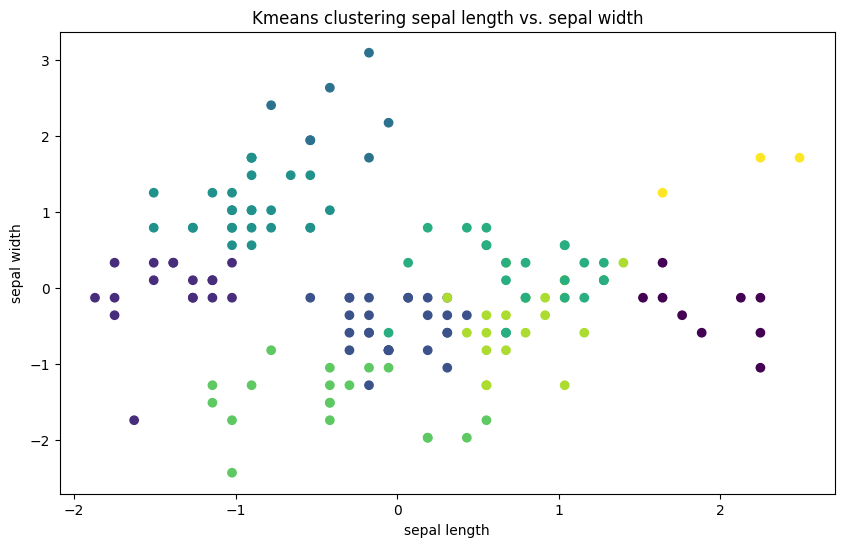

In [ ]:
kmeans_opti = KMeans(n_clusters = 9, init='k-means++')
kmeans_opti.fit(ir_data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(ir_data_scaled[:, 0], ir_data_scaled[:, 1], c=kmeans_opti.labels_)
plt.title('Kmeans clustering sepal length vs. sepal width')
plt.xlabel("sepal length")
plt.ylabel("sepal width")

Text(0, 0.5, 'sepal width')

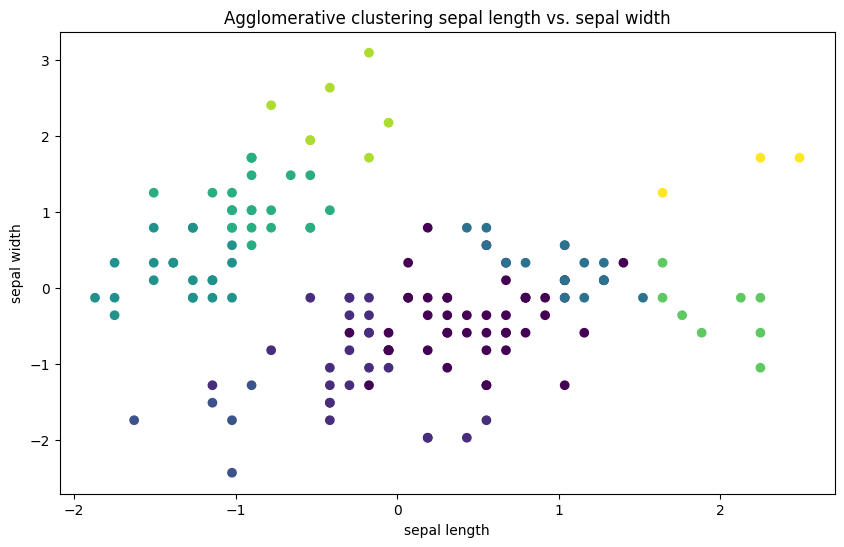

In [ ]:
# plotting the result of the clustering of the agglomerative clustering
plt.figure(figsize=(10, 6))
plt.scatter(ir_data_scaled[:, 0], ir_data_scaled[:, 1], c=ag_ir.labels_)
plt.title('Agglomerative clustering sepal length vs. sepal width')
plt.xlabel("sepal length")
plt.ylabel("sepal width")

Text(0, 0.5, 'petal width')

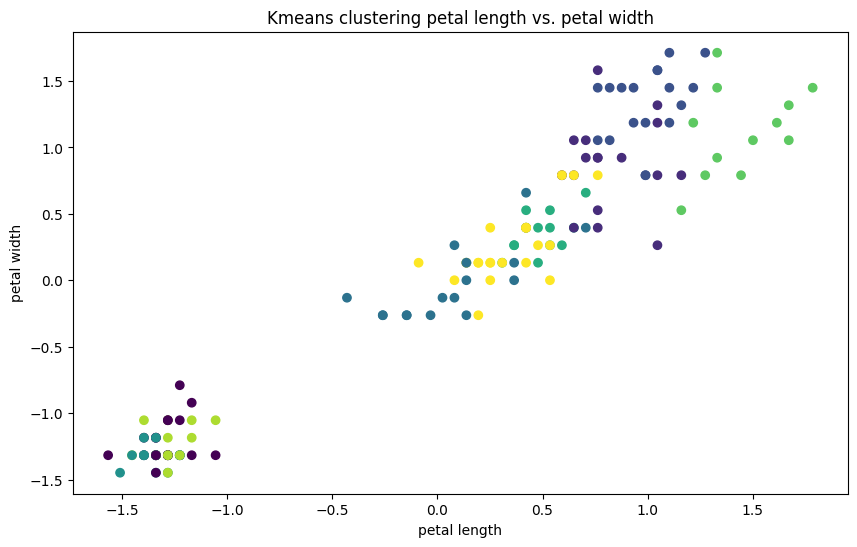

In [ ]:
kmeans_opti = KMeans(n_clusters = 9, init='k-means++')
kmeans_opti.fit(ir_data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(ir_data_scaled[:, 2], ir_data_scaled[:, 3], c=kmeans_opti.labels_)
plt.title('Kmeans clustering petal length vs. petal width')
plt.xlabel("petal length")
plt.ylabel("petal width")

Text(0, 0.5, 'petal width')

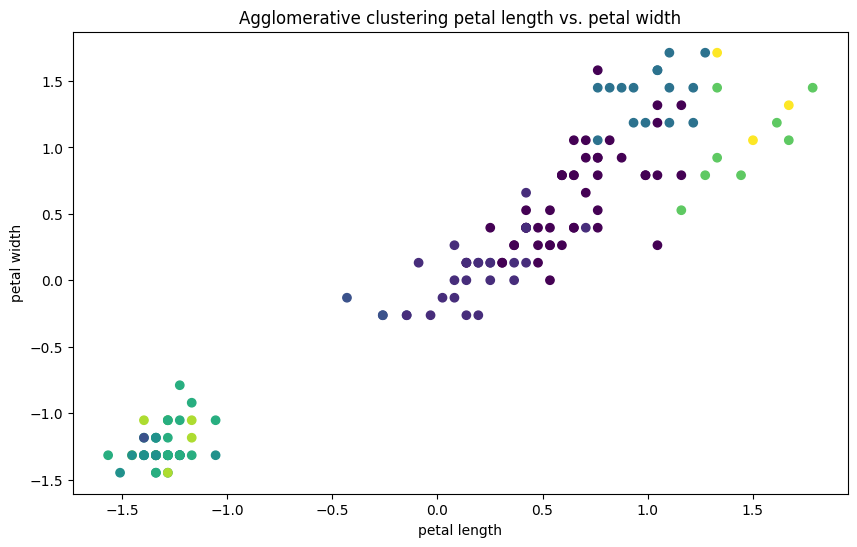

In [ ]:
# plotting the result of the clustering of the agglomerative clustering
plt.figure(figsize=(10, 6))
plt.scatter(ir_data_scaled[:, 2], ir_data_scaled[:, 3], c=ag_ir.labels_)
plt.title('Agglomerative clustering petal length vs. petal width')
plt.xlabel("petal length")
plt.ylabel("petal width")

comparing the results of using the kmeans and agglomerative clustering on my dataset, I have observed that using the kmeans clustering model on my dataset provides outputs a better result compared to using the agglomerative clustering, even though there are points that are misclustered (might be an outlier) k means provide a more better clustering compared to the other model

#### Conclusion

To conclude this Hands-on Activity, I have found out that Kmeans clustering uses centroids to cluster the datapoints in our dataset, while the agglomerative clustering uses starts with the closest distances of clusters (or datapoints) to make linkages and make groupings around the dataset. <br> <br>

To evaluate the k means model we need to get its inertia value, the smaller the inertia value the better performance kmeans model that we have. To evaluate our agglomerative model we need to look our dendogram graph, where we need to fin the longest or largest vertical value.   <br> <br>

I concluded in this activity that when we get a high value of the number of clusters in our agglomerative clustering it will yield a low value vertical value of the dendogram and vice versa, and increasing the number of cluster in kmeans clustering leads to decreasing number inertia value (but in my supplementary activity 9 cluster yields lower inertia value compared to my 10 number of clusters)